# SUPPLY CHAIN OPTIMIZATION

In [46]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

pd.set_option("display.max_columns", None)
pd.set_option("display.max_row", 100)
%matplotlib inline

## I. Data input

In [3]:
# Import order data
order=pd.read_csv(r'C:\Users\ADMIN\Desktop\Hoan\Portfolio\supply_chain_optimization\orders.csv')
order.head()

,Customer ID,Customer Status,Date Order was placed,Delivery Date,Order ID,Product ID,Quantity Ordered,Total Retail Price for This Order,Cost Price Per Unit
0,579,Silver,01-Jan-17,07-Jan-17,123002578,220101400106,2,92.6,20.70
1,7574,SILVER,01-Jan-17,05-Jan-17,123004074,210201000009,1,21.7,9.95
2,28861,Gold,01-Jan-17,04-Jan-17,123000871,230100500068,1,1.7,0.80
3,43796,Gold,01-Jan-17,06-Jan-17,123002851,220100100633,1,47.9,24.05
4,54673,Gold,01-Jan-17,04-Jan-17,123003607,220200200043,1,36.9,18.30


In [4]:
order.shape

(185013, 9)

In [5]:
# Import product data
product=pd.read_csv(r'C:\Users\ADMIN\Desktop\Hoan\Portfolio\supply_chain_optimization\product-supplier.csv')
product.head()

,Product ID,Product Line,Product Category,Product Group,Product Name,Supplier Country,Supplier Name,Supplier ID
0,210100100001,Children,Children Outdoors,"Outdoor things, Kids",Boy's and Girl's Ski Pants with Braces,NO,Scandinavian Clothing A/S,50
1,210100100002,Children,Children Outdoors,"Outdoor things, Kids",Children's Jacket,ES,Luna sastreria S.A.,4742
2,210100100003,Children,Children Outdoors,"Outdoor things, Kids",Children's Jacket Sidney,NO,Scandinavian Clothing A/S,50
3,210100100004,Children,Children Outdoors,"Outdoor things, Kids",Children's Rain Set,NO,Scandinavian Clothing A/S,50
4,210100100005,Children,Children Outdoors,"Outdoor things, Kids",Children's Rain Suit,NO,Scandinavian Clothing A/S,50


In [6]:
product.shape

(5504, 8)

We have 2 tables, one is order table which contains transaction information, the other is product table which contains product information. These two tables are connected through "Product ID" column. To make the analysis easier, we will join the information from the product table to the orders table.

In [47]:
# Merge 2 tables
df=pd.merge(left=order, right=product, how='left', on='Product ID')
df.head()

,Customer ID,Customer Status,Date Order was placed,Delivery Date,Order ID,Product ID,Quantity Ordered,Total Retail Price for This Order,Cost Price Per Unit,Product Line,Product Category,Product Group,Product Name,Supplier Country,Supplier Name,Supplier ID
0,579,Silver,01-Jan-17,07-Jan-17,123002578,220101400106,2,92.6,20.70,Clothes & Shoes,Clothes,Tracker Clothes,Casual V-Neck Men's Sweatshirt,US,3Top Sports,2963
1,7574,SILVER,01-Jan-17,05-Jan-17,123004074,210201000009,1,21.7,9.95,Children,Children Sports,Tracker Kid's Clothes,Children's Tee,US,3Top Sports,2963
2,28861,Gold,01-Jan-17,04-Jan-17,123000871,230100500068,1,1.7,0.80,Outdoors,Outdoors,Outdoor Gear,Plate Picnic Deep,GB,Prime Sports Ltd,316
3,43796,Gold,01-Jan-17,06-Jan-17,123002851,220100100633,1,47.9,24.05,Clothes & Shoes,Clothes,Eclipse Clothing,Woman's Woven Pants L,US,Eclipse Inc,1303
4,54673,Gold,01-Jan-17,04-Jan-17,123003607,220200200043,1,36.9,18.30,Clothes & Shoes,Shoes,Shoes,Soft Gel Court Men's Indoor Shoes,US,Pro Sportswear Inc,1747


In [8]:
# Rename columns for analysis and writting
df.rename(columns={'Customer ID':'customer_id',
                   'Customer Status':'customer_status', 
                   'Date Order was placed':'order_date',
                   'Delivery Date':'delivery_date',
                   'Order ID':'order_id',
                   'Product ID':'product_id', 
                   'Quantity Ordered':'quantity',
                   'Total Retail Price for This Order':'total_sales',
                   'Cost Price Per Unit':'cost_per_unit',
                   'Product Line':'product_line', 
                   'Product Category':'product_category', 
                   'Product Group':'product_group', 
                   'Product Name':'product_name',
                   'Supplier Country':'supplier_country', 
                   'Supplier Name':'supplier_name', 
                   'Supplier ID':'supplier_id'}, inplace=True)

## II. Data Exploration

In [9]:
# Basic info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185013 entries, 0 to 185012
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   customer_id       185013 non-null  int64  
 1   customer_status   185013 non-null  object 
 2   order_date        185013 non-null  object 
 3   delivery_date     185013 non-null  object 
 4   order_id          185013 non-null  int64  
 5   product_id        185013 non-null  int64  
 6   quantity          185013 non-null  int64  
 7   total_sales       185013 non-null  float64
 8   cost_per_unit     185013 non-null  float64
 9   product_line      185013 non-null  object 
 10  product_category  185013 non-null  object 
 11  product_group     185013 non-null  object 
 12  product_name      185013 non-null  object 
 13  supplier_country  185013 non-null  object 
 14  supplier_name     185013 non-null  object 
 15  supplier_id       185013 non-null  int64  
dtypes: float64(2), int64

Our data consists of 16 columns with over 185k records.

In [10]:
# Check missing values
df.isnull().sum()

customer_id         0
customer_status     0
order_date          0
delivery_date       0
order_id            0
product_id          0
quantity            0
total_sales         0
cost_per_unit       0
product_line        0
product_category    0
product_group       0
product_name        0
supplier_country    0
supplier_name       0
supplier_id         0
dtype: int64

In [11]:
# Check duplicated rows
df.duplicated().sum()

0

The data also has no null values ​​or duplicate data.

In [12]:
# Convert data type
df['order_date']=pd.to_datetime(df['order_date'])
df['delivery_date']=pd.to_datetime(df['delivery_date'])

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10032\4126176228.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['order_date']=pd.to_datetime(df['order_date'])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10032\4126176228.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['delivery_date']=pd.to_datetime(df['delivery_date'])


In [13]:
# Create columns month and year to make it easier for grouping
df['order_month']=df['order_date'].dt.month
df['order_year']=df['order_date'].dt.year

Since the original date data is in both letter and number format, we will convert it to a common format so that we can easily separate the month and year.

## III. Analysis

### 3.1. EDA

In [49]:
# Basic statistics about dataset
df.describe()

,Customer ID,Order ID,Product ID,Quantity Ordered,Total Retail Price for This Order,Cost Price Per Unit,Supplier ID
count,185013.000000,1.850130e+05,1.850130e+05,185013.000000,185013.000000,185013.000000,185013.000000
mean,45379.318745,1.237010e+08,2.289549e+11,1.671645,138.592982,38.695275,5476.996319
std,27231.520233,4.288138e+05,1.066198e+10,0.897982,183.848434,42.368467,5359.342780
min,1.000000,1.230000e+08,2.102001e+11,1.000000,0.625000,0.200000,50.000000
25%,22061.000000,1.233159e+08,2.201014e+11,1.000000,39.500000,13.000000,1303.000000
50%,44069.000000,1.236862e+08,2.301005e+11,1.000000,83.700000,25.200000,3298.000000
75%,70350.000000,1.240719e+08,2.402001e+11,2.000000,170.400000,49.350000,6071.000000
max,94253.000000,1.245000e+08,2.408002e+11,10.000000,6382.000000,791.800000,18139.000000


In [16]:
# Classify the fields
categorical=df.select_dtypes(include='object') #categorical columns
cat_cols=categorical.columns

numerical=df.select_dtypes(exclude='object').loc[:,['quantity', 'total_sales','total_cost', 'cost_per_unit']] #numerical columns
num_cols=numerical.columns

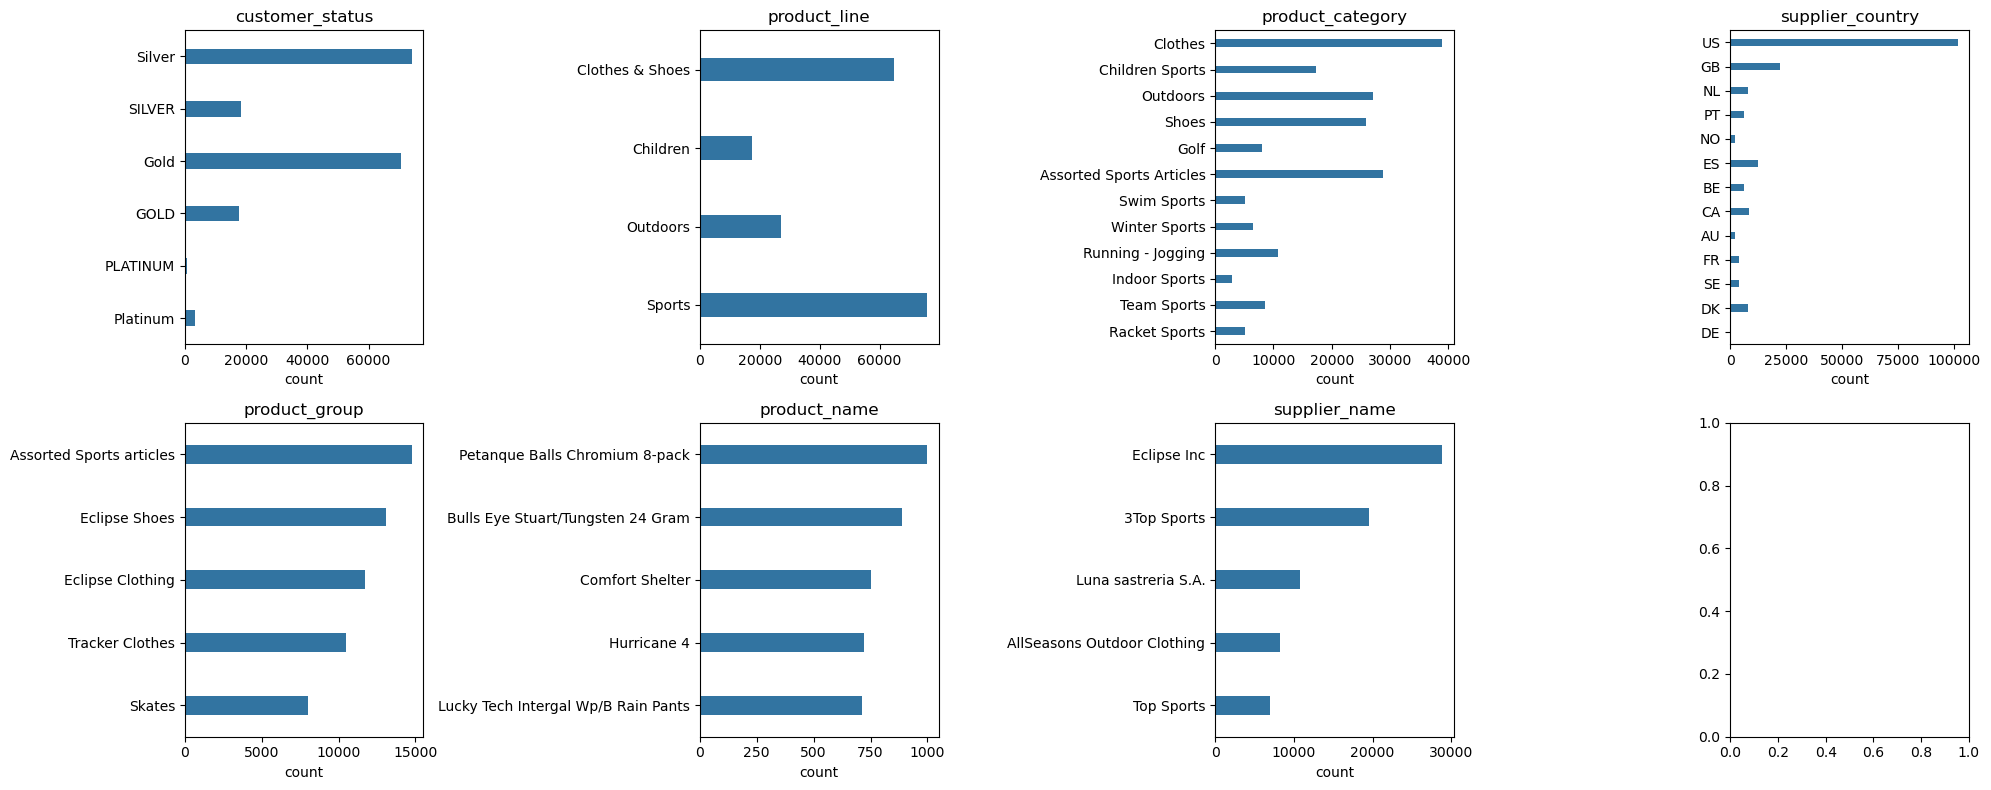

In [17]:
# Visualize each fields in categorical columns
fig, ax=plt.subplots(2,4, figsize=(20,8))
ax=ax.flatten()
for i, col in enumerate(cat_cols.drop(['product_group', 'product_name', 'supplier_name'])):
    sns.countplot(data=df, y=col, ax=ax[i], orient='h', width=0.3)
    ax[i].set_title(col)
    ax[i].set(ylabel=None)

# Because the remaining columns have too many unique values, so we will visualize top 5 values
pro_group=df['product_group'].value_counts().head().to_frame()
sns.barplot(data=pro_group, y='product_group', x='count', orient='h', width=0.3, ax=ax[4])
ax[4].set_title('product_group')
ax[4].set(ylabel=None)

pro_name=df['product_name'].value_counts().head().to_frame()
sns.barplot(data=pro_name, y='product_name', x='count', orient='h', width=0.3, ax=ax[5])
ax[5].set_title('product_name')
ax[5].set(ylabel=None)

sup_name=df['supplier_name'].value_counts().head().to_frame()
sns.barplot(data=sup_name, y='supplier_name', x='count', orient='h', width=0.3, ax=ax[6])
ax[6].set_title('supplier_name')
ax[6].set(ylabel=None)

plt.tight_layout()

Based on the charts above, we can see:
- In the customer_status chart, there are up to 6 values ​​listed, however, 3 of them are separated into other values ​​due to formatting errors. Therefore, in fact, this column only has 3 unique values
- Regarding product_line, in 4 product lines, the orders are mainly for sports, shoes and related clothing.
- Regarding product_category, there are 12 categories, the most are still for clothes.
- Regarding supplier_country, it can be seen that the orders are mainly for products from suppliers from the United States (US), in addition, there are also some orders from the UK but the quantity is much lower than the US
- Regarding product_group, product_name and supplier_name, since there are quite a few unique values ​​in each column, we will choose the 5 values ​​with the largest number of orders.

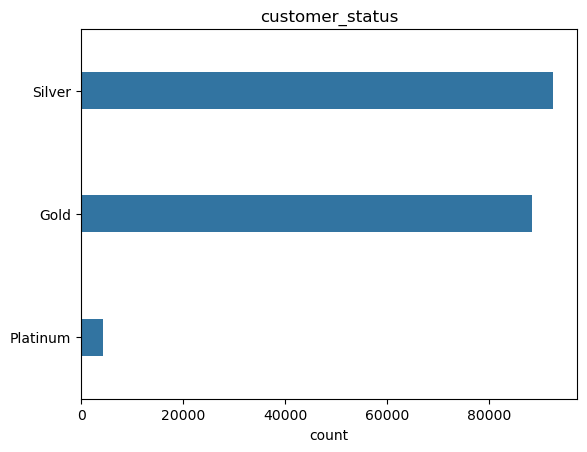

In [18]:
# Since in customer_status, there are 2 type of string formats, so we need to unify 1 format: only capitalize the first letter
df['customer_status']=df['customer_status'].str.capitalize()

sns.countplot(data=df, y='customer_status', orient='h', width=0.3)
plt.title('customer_status')
plt.ylabel(None);

After editing, the customer_status column has only 3 unique values, most of the orders belong to 2 customer groups: Silver and Gold. There are only a very small number of high-end customers.

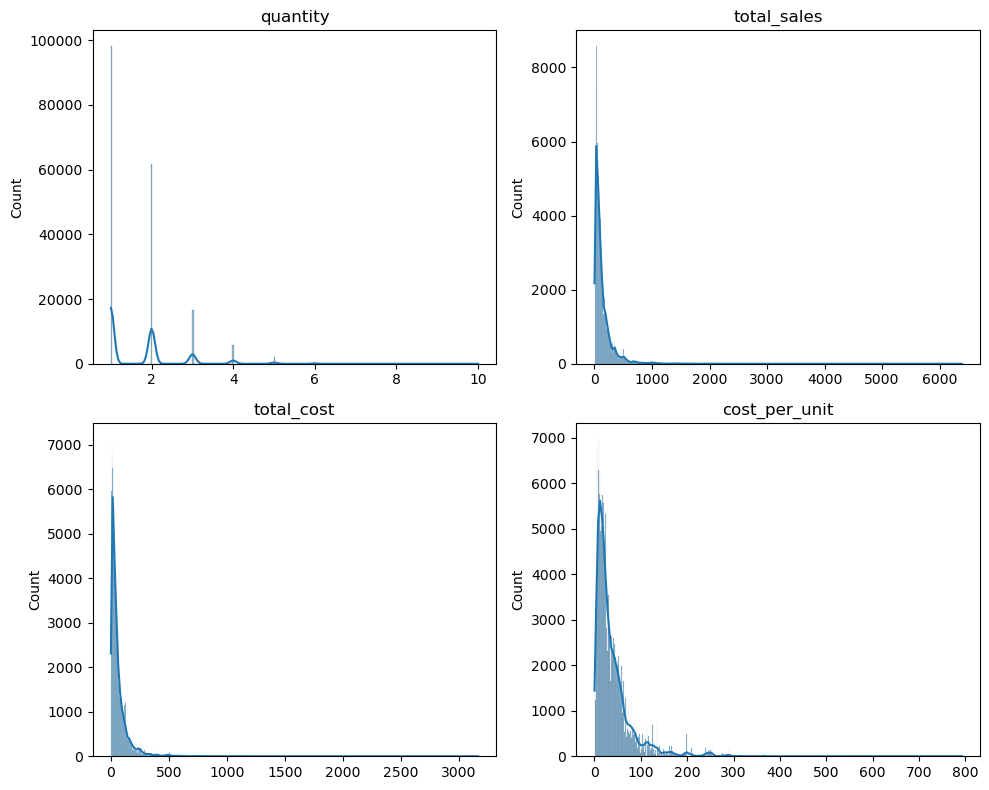

In [19]:
# Visualize each fields in numerical columns
fig, ax=plt.subplots(2,2, figsize=(10,8))
ax=ax.flatten()
for i, col in enumerate(num_cols):
    sns.histplot(data=df, x=col, ax=ax[i], kde=True)
    ax[i].set_title(col)
    ax[i].set(xlabel=None)
    plt.tight_layout()

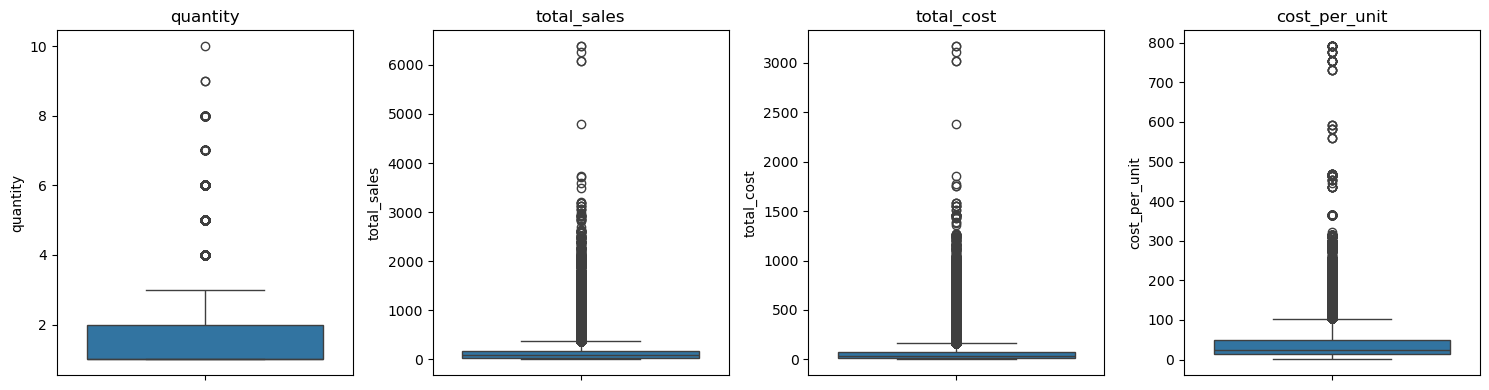

In [20]:
fig, ax=plt.subplots(1,4, figsize=(15,4))
ax=ax.flatten()
for i, col in enumerate(num_cols):
    sns.boxplot(data=df, y=col, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set(xlabel=None)
    plt.tight_layout()

Based on the two types of charts above, it can be seen that most of the data in the numerical columns have a left-skewed distribution and there are quite a few outliers. However, since the purpose of the project is only analysis, removing outliers and transforming the data to bring it closer to a normal distribution is not necessary.

### 3.2. Demand analysis

In [14]:
# Create total cost column
df['total_cost']=df['quantity']*df['cost_per_unit']

In [21]:
# Calculate total profit of each orders
df['total_profit']=df['total_sales']-df['total_cost']

In [22]:
# Sales overview for 5 years (2017-2021)
print('Number of customers: ', df['customer_id'].nunique())
print('Number of orders: ', df['order_id'].nunique())
print('Total quantity sold: ', df['quantity'].sum())
print('Total Sales: ', df['total_sales'].sum().round(2))
print('Total Cost: ', df['total_cost'].sum().round(2))
print('Total Profit: ', df['total_profit'].sum().round(2))

Number of customers:  56027
Number of orders:  185013
Total quantity sold:  309276
Total Sales:  25641503.32
Total Cost:  12023091.32
Total Profit:  13618411.99


Overview of some sales indicators over the past 5 years, it can be seen that the company has more than 56 thousand customers, more than 185 thousand orders with the number of products sold is nearly 310 thousand, bringing in more than 25 million dollars in revenue and more than 13 million dollars in profit.

In [23]:
# Detail sales overview in each years
sale_overview=df.groupby('order_year').agg({'total_sales':'sum',
                                           'total_cost':'sum',
                                           'total_profit':'sum',
                                           'order_id':'count'}).\
                                            round(2).\
                                            reset_index().\
                                            rename(columns={'order_id':'total_orders'})
sale_overview=sale_overview.assign(avg_sales=sale_overview['total_sales']/sale_overview['total_orders'],
                                  avg_profit=sale_overview['total_profit']/sale_overview['total_orders']).round(2)
sale_overview

,order_year,total_sales,total_cost,total_profit,total_orders,avg_sales,avg_profit
0,2017,4054304.54,1894498.73,2159805.81,29549,137.21,73.09
1,2018,4820401.71,2264955.76,2555445.95,34692,138.95,73.66
2,2019,5845473.48,2744015.97,3101457.51,42306,138.17,73.31
3,2020,4984815.93,2334113.62,2650702.32,35901,138.85,73.83
4,2021,5936507.66,2785507.24,3151000.42,42565,139.47,74.03


''

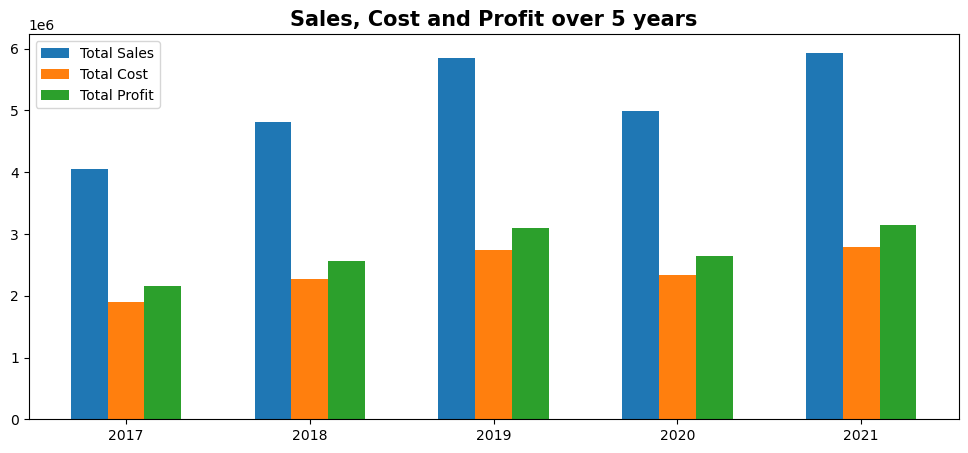

In [24]:
# Visualize
plt.figure(figsize=(12,5))
bar_width = 0.2
index = np.arange(len(sale_overview['order_year']))

plt.bar(index, sale_overview['total_sales'], bar_width, label='Total Sales')
plt.bar(index + bar_width, sale_overview['total_cost'], bar_width, label='Total Cost')
plt.bar(index + 2 * bar_width, sale_overview['total_profit'], bar_width, label='Total Profit')

plt.title('Sales, Cost and Profit over 5 years', fontsize=15, fontweight='bold')
plt.xticks(index + bar_width, sale_overview['order_year'])
plt.legend()
;

**Insight:**

Based on the chart above, it can be seen that revenue has been increasing for 3 consecutive years (2017, 2018, 2019) and increased again in 2021 after a decline in 2020. The reason may be due to the impact of the Covid pandemic, leading to a decrease in the number of orders, thereby leading to a decrease in revenue. Fortunately, costs and profits also change according to the revenue trend and there is no year with a sudden increase.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10032\1692951880.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rev_growth['growth_rate']=rev_growth['total_sales'].pct_change().fillna(value=0)*100
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10032\1692951880.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=rev_growth, x='order_year', y='growth_rate', width=0.5, palette='flare')


''

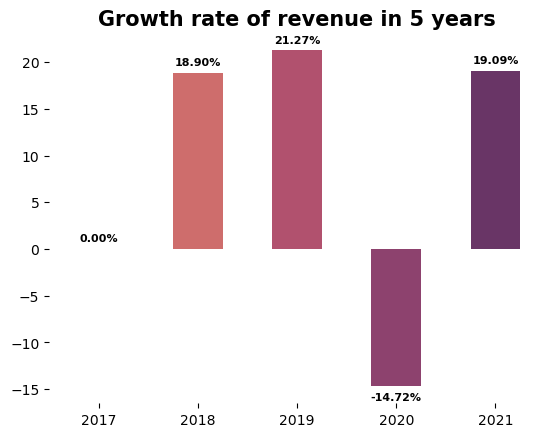

In [25]:
# Revenue growth for 5 years
rev_growth=sale_overview[['order_year', 'total_sales']]
rev_growth['growth_rate']=rev_growth['total_sales'].pct_change().fillna(value=0)*100

# Visualize
ax=sns.barplot(data=rev_growth, x='order_year', y='growth_rate', width=0.5, palette='flare')
for i in ax.containers:
    ax.bar_label(i, padding=4, color='black', fontsize=8, label_type='edge',
                 fontweight='bold', fmt='%.2f%%')

ax.spines[['left', 'top', 'bottom', 'right']].set_visible(False)
plt.title('Growth rate of revenue in 5 years', fontsize=15, fontweight='bold')
plt.xlabel(None)
plt.ylabel(None)
;

To see more clearly the change in revenue, the chart above shows that the revenue growth is quite good, above 18%/year, except for a decrease of nearly 15% in 2020.

In [26]:
# Detail sales per month in each years
detail=df.groupby(['order_year', 'order_month']).agg({'total_sales':'sum',
                                           'total_cost':'sum',
                                           'total_profit':'sum',
                                           'order_id':'count'}).round(2).reset_index()
detail_pv=detail.pivot(index='order_month', columns='order_year', values='total_sales') #focus on sales
detail_pv

order_year,2017,2018,2019,2020,2021
order_month,,,,,
1,286772.78,363311.55,427319.80,363965.36,422961.34
2,239348.82,318170.45,332184.68,305807.60,336529.26
3,224318.98,268101.80,326955.57,276046.08,279331.88
4,319435.68,404202.37,476984.95,403484.10,454806.34
5,376750.05,444377.64,531179.40,462698.18,512668.84
6,473481.00,571664.94,690287.35,577972.75,642173.51
7,477803.44,557841.57,687226.44,581496.05,664787.10
8,470162.00,534740.50,696720.98,562614.13,658272.60
9,210577.32,236828.90,324951.13,251785.21,313872.49


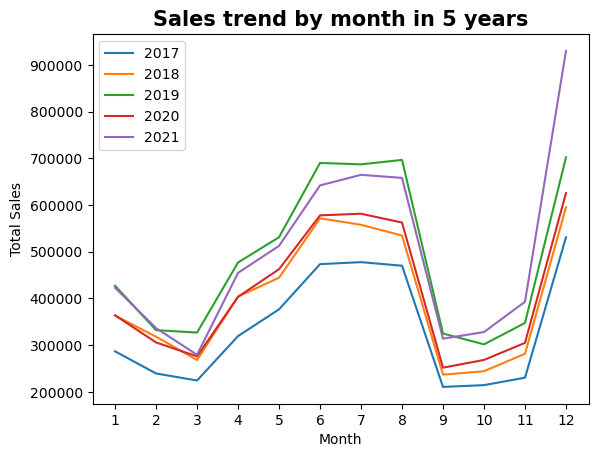

In [27]:
# Visualize
for col in detail_pv.columns:
    sns.lineplot(data=detail_pv, x='order_month', y=col, label=col)
    
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.title('Sales trend by month in 5 years', fontsize=15, fontweight='bold')
plt.xticks(np.arange(1,13,1))
plt.legend();

**Insight**

Going deeper by month, it can be seen that over the past 5 years, there has always been a general purchasing trend, even affected by the Covid epidemic. Sales revenue will decrease slightly at the beginning of the year (first quarter) and tend to increase quite strongly in the summer. Since this is a sportswear company, it is easy to understand that in the summer, the demand for sports increases sharply, leading to a very strong increase in purchasing demand at this time. In the autumn months, revenue begins to show signs of slowing down before falling into a sharp decline in early winter. Although the demand for outdoor sports decreases in this season, the demand for accessories, clothes, and sports shoes increases, as evidenced by the fact that in December, in all 5 years, revenue has increased very strongly.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10032\1388626727.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=profitable, x='total_profit', y='product_category', orient='h', width=0.5, palette=color)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10032\1388626727.py:8: UserWarning: The palette list has more values (20) than needed (12), which may not be intended.
  ax=sns.barplot(data=profitable, x='total_profit', y='product_category', orient='h', width=0.5, palette=color)


''

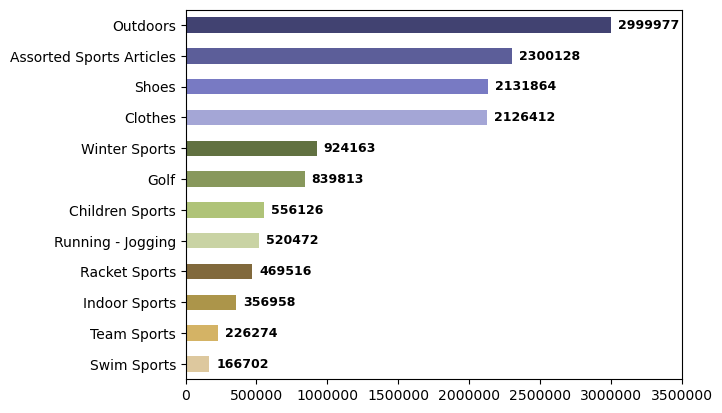

In [28]:
# Most profitable product category
profitable=df.groupby('product_category').agg({'total_profit':'sum'}).\
                                                sort_values(by='total_profit', ascending=False).\
                                                reset_index()
profitable['total_profit'].round(2)

color = sns.color_palette('tab20b')
ax=sns.barplot(data=profitable, x='total_profit', y='product_category', orient='h', width=0.5, palette=color)
for i in ax.containers:
    ax.bar_label(i, padding=5, color='black', 
             fontsize=9, label_type='edge',
            fontweight='bold', 
            fmt='%d')

plt.xlabel(None)
plt.ylabel(None)
plt.xticks(np.arange(0, 4000000, 500000), minor=True)
ax.xaxis.get_major_formatter().set_scientific(False)
;

**Insight**

The chart above shows the revenue distribution by product_category, it can be seen that the company's main revenue comes mostly from selling products related to Ourdoors, Assorted Sports Articles, Shoes and Clothes with revenue of over 2 million dollars. With the remaining product categories, the revenue does not have too strong a difference, mainly from less popular product categories.

''

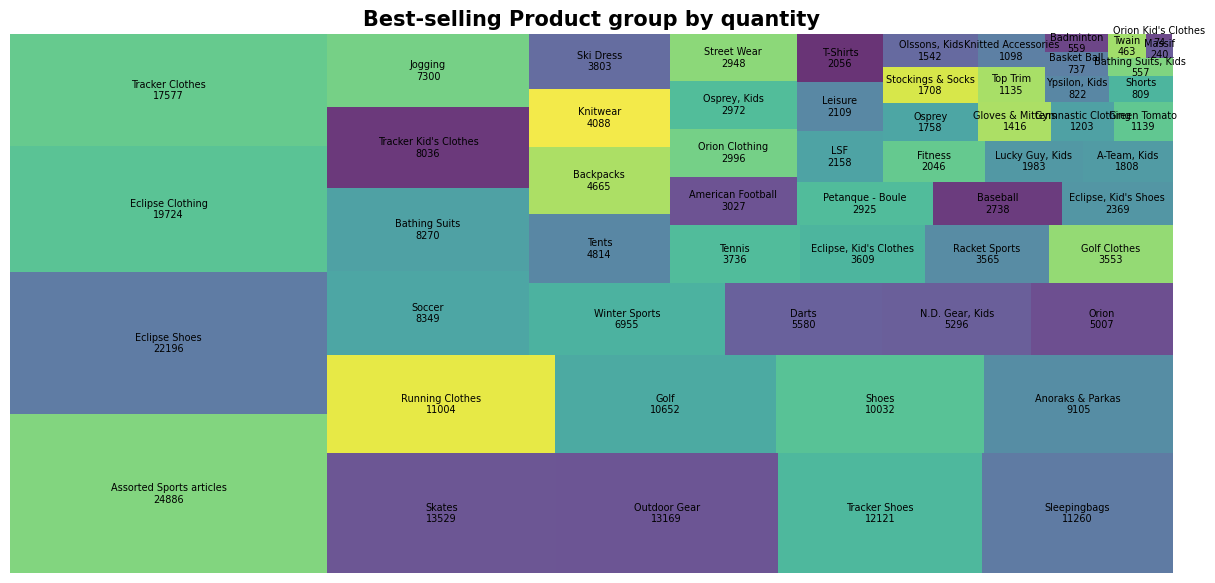

In [29]:
# Best-selling product group quantity

best_selling=df.groupby('product_group').agg({'quantity':'sum'}).\
                                                rename(columns={'quantity':'total_quantity'}).\
                                                sort_values(by='total_quantity', ascending=False).\
                                                reset_index()
sizes=best_selling['total_quantity']
label=best_selling['product_group']+'\n'+best_selling['total_quantity'].astype(str)


fig=plt.figure(figsize=(15,7))
squarify.plot(sizes=sizes, label=label, alpha=0.8, text_kwargs={'fontsize': 7})

plt.title('Best-selling Product group by quantity', fontsize=15, fontweight='bold')
plt.axis('off')
;

### 3.3. Delivery analysis

In [30]:
# Calculate delivery time
df['shipping_time']=(df['delivery_date']-df['order_date']).dt.days

Because we don't have enough information to calculate delivery lead time, so we assume that the time between order date and delivery date is the time from when the customer places an order until the product is delivered to the customer. This time does not include the time from when the supplier starts designing the product until it is in your warehouse. We also assume that the time from design to inventory is optimized, so we will focus on optimizing delivery time.

In [31]:
# Average delivery time
print('Average Delivery Time:',(df['shipping_time'].sum()/df['order_id'].count()).round(2))

Average Delivery Time: 1.06


In [32]:
# Average delivery time for 5 years
avg_shipping_time=df.groupby('order_year').agg({'shipping_time':'mean'})
avg_shipping_time

,shipping_time
order_year,
2017,1.105587
2018,1.052779
2019,1.042760
2020,1.098326
2021,1.005169


It can be seen that the company's average delivery time is quite good, just over 1 day over the past 5 years, which shows that the delivery time issue is being optimized very well.

''

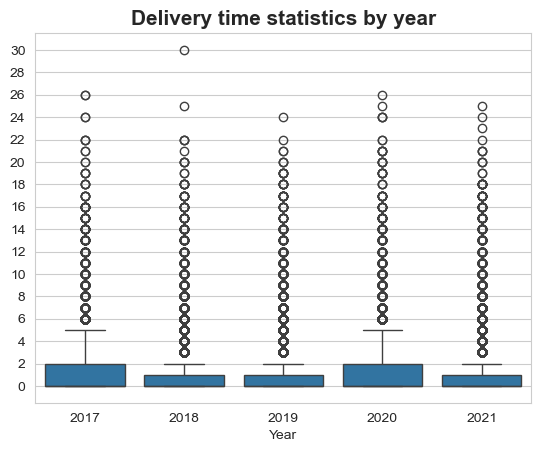

In [33]:
sns.set_style('whitegrid')
sns.boxplot(data=df, x='order_year', y='shipping_time')
plt.xlabel('Year')
plt.yticks(np.arange(0,32,2))
plt.ylabel(None)
plt.title('Delivery time statistics by year', fontsize=15, fontweight='bold')
;

**Insight**

Although the overall average delivery time is quite low, when looking deeper into the delivery time statistics over the years, it can be seen that there are still many orders with quite high delivery times, even in 2018 there were orders lasting up to 30 days. Most of the remaining orders are only around 2 days, maybe up to 5 days. In general, the issue of delivery time is being optimized quite well.

In [34]:
# Average delivery time by month
avg_sp_month=df.groupby(['order_year', 'order_month']).agg({'shipping_time':'mean'}).round(2).reset_index()
avg_sp_month=avg_sp_month.pivot(index='order_month', columns='order_year', values='shipping_time')
avg_sp_month

order_year,2017,2018,2019,2020,2021
order_month,,,,,
1,1.07,1.08,1.05,1.12,1.10
2,0.94,0.91,0.96,0.97,0.96
3,0.95,0.91,0.88,1.03,0.92
4,1.22,1.11,1.11,1.16,1.09
5,1.17,1.18,1.13,1.15,1.18
6,1.22,1.10,1.08,1.17,1.07
7,1.20,1.07,1.07,1.12,1.12
8,1.18,1.14,1.09,1.15,1.02
9,0.77,0.81,0.79,0.81,0.71


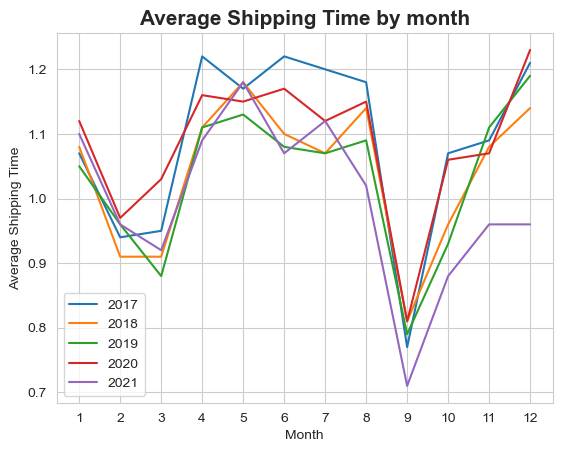

In [35]:
# Visualize
for col in avg_sp_month.columns:
    sns.lineplot(data=avg_sp_month, x='order_month', y=col, label=col)
    
plt.ylabel('Average Shipping Time')
plt.xlabel('Month')
plt.title('Average Shipping Time by month', fontsize=15, fontweight='bold')
plt.xticks(np.arange(1,13,1))
plt.legend();

**Insight**

It can be clearly seen that the average delivery time over the past 5 years has also shown a clear trend, quite similar to the trend of revenue, which shows that there may be a clear relationship between revenue and average delivery time. The evidence is that delivery time will decrease at the beginning of the year due to fewer orders during this period, and from April to August, revenue increases, meaning more orders, and therefore delivery time also increases. The same is true for the period from September to December.

In [36]:
# Shipping time by product
avg_pro_ship=df.groupby('product_category').agg({'shipping_time':'mean'}).round(2).sort_values(by='shipping_time', ascending=False).reset_index()
avg_pro_ship

,product_category,shipping_time
0,Indoor Sports,1.36
1,Racket Sports,1.24
2,Assorted Sports Articles,1.20
3,Outdoors,1.18
4,Winter Sports,1.18
5,Running - Jogging,1.10
6,Swim Sports,1.07
7,Children Sports,0.99
8,Shoes,0.96
9,Golf,0.95


''

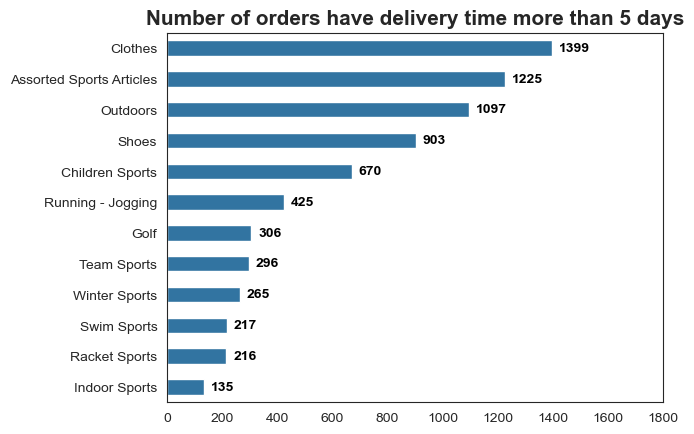

In [37]:
# The type of product that takes time to ship (> 5 days)
pro_ship=df[df['shipping_time']>5].groupby('product_category').agg({'order_id':'count'}).\
                                                        rename(columns={'order_id':'number_of_order'}).\
                                                        sort_values(by='number_of_order', ascending=False).\
                                                        reset_index()

sns.set_style('white')
ax=sns.barplot(data=pro_ship, y='product_category', x='number_of_order', orient='h', width=0.5)
for i in ax.containers:
    ax.bar_label(i, padding=5, color='black', 
             fontsize=10, label_type='edge',
            fontweight='bold', 
            fmt='%d')

plt.xlabel(None)
plt.ylabel(None)
plt.xticks(np.arange(0,2000,200))
plt.title('Number of orders have delivery time more than 5 days', fontsize=15, fontweight='bold')
;

### 3.4. Suppliers analysis

In [38]:
# Total orders, total quantity and total revenue per supplier
supplier_order=df.groupby('supplier_name').agg({'order_id':'count',
                                 'quantity':'sum',
                                'total_sales':'sum'}).\
                            sort_values(by=['total_sales', 'quantity'], ascending=[False, False]).\
                            reset_index().round(2).rename(columns={'order_id':'number_of_orders'})
supplier_order.head(10)

,supplier_name,number_of_orders,quantity,total_sales
0,Eclipse Inc,28876,48744,3681765.17
1,Magnifico Sports,6046,10151,1701185.40
2,3Top Sports,19551,33057,1696429.39
3,Twain Inc,5711,9705,1557024.90
4,Petterson AB,3603,6078,1403886.70
5,AllSeasons Outdoor Clothing,8230,13931,1307753.10
6,Luna sastreria S.A.,10782,18227,1146638.49
7,Top Sports,7013,11875,1141039.40
8,Mayday Inc,4665,7780,978230.45
9,Van Dammeren International,5853,10146,925994.92


''

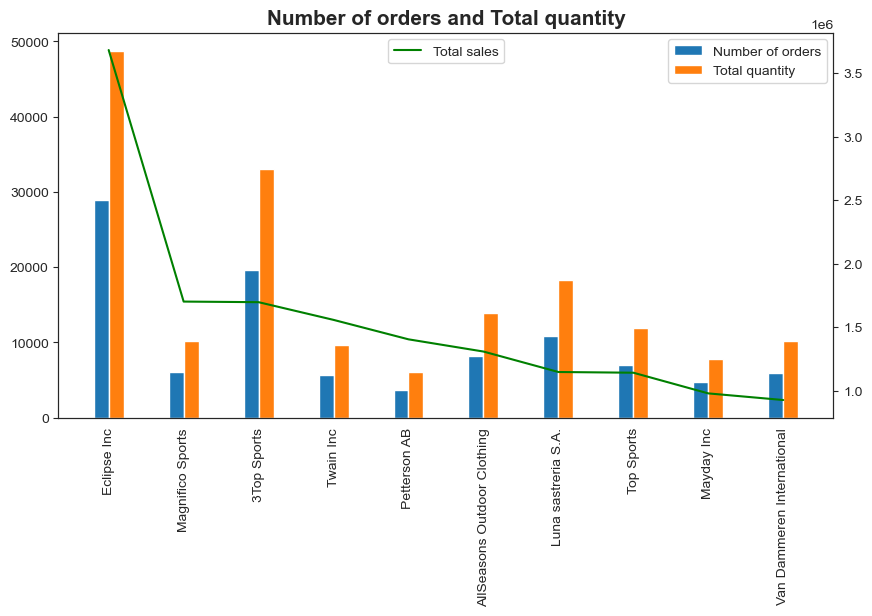

In [39]:
# Visualize
plt.figure(figsize=(10,5))
bar_width = 0.2
index = np.arange(len(supplier_order.head(10)))

ax1=plt.gca()
ax1.bar(index, supplier_order['number_of_orders'].head(10), bar_width, label='Number of orders')
ax1.bar(index + bar_width, supplier_order['quantity'].head(10), bar_width, label='Total quantity')

ax2=ax1.twinx()

ax2.plot(index + bar_width/2, supplier_order['total_sales'].head(10), label='Total sales', color='green')

ax1.set_title('Number of orders and Total quantity', fontsize=15, fontweight='bold')
ax1.set_xticks(index + bar_width/2, supplier_order['supplier_name'].head(10), rotation=90)
ax1.legend()
ax2.legend(loc='upper center')
;

**Insight**

The company currently has 64 different suppliers from more than 12 countries, although most of them are from the US. The chart above focuses on the 10 suppliers that bring in the largest revenue. It is quite strange that there are suppliers that bring in fewer orders and fewer products sold but have better revenue than suppliers with more orders and more products sold. This can be explained by the selling price of the product as well as the customer segment that the supplier is targeting.

In [40]:
# Last 10 suppliers with lowest revenue
supplier_order.tail(10)

,supplier_name,number_of_orders,quantity,total_sales
54,KN Outdoor Trading Inc,889,1539,22607.63
55,Carolina Sports,505,864,18221.46
56,Sockeye Sportswear Inc,381,601,11469.90
57,Bon Garrments,308,492,6372.60
58,SnowSports International GmBH,58,96,3399.00
59,Schroeder Trim GmBH,133,224,2282.01
60,Dutchman Bikes,35,57,1966.50
61,SportPharma Inc,44,69,1753.90
62,Meister Pharma & Chemie GmBH,60,111,677.10
63,A. Pereira Sport,30,50,330.00


**Insight**

Besides, there are also suppliers who have very few orders as well as very few products sold, partly due to the product brand not being favored by customers. The company needs to consider whether to stop cooperating with these suppliers to focus on the suppliers that bring the most revenue to the company.

In [41]:
# Top 3 suppliers of each product category
grouped_df=df.groupby(['product_category', 'supplier_name']).agg({'quantity':'sum'})
top_3_suppliers=grouped_df.groupby(level=0, group_keys=False).apply(lambda x: x.nlargest(3, 'quantity'))
top_3_suppliers

quantity
product_category         supplier_name                         
Assorted Sports Articles Magnifico Sports                 10006
                         Royal Darts Ltd                   9975
                         Luna sastreria S.A.               8223
Children Sports          3Top Sports                       8177
                         Eclipse Inc                       5908
                         Luna sastreria S.A.               3992
Clothes                  Eclipse Inc                      20421
                         3Top Sports                      13979
                         Fuller Trading Co.                8032
Golf                     Van Dammeren International        7330
                         HighPoint Trading                 1514
                         Mike Schaeffer Inc                1276
Indoor Sports            TrimSport B.V.                    1679
                         Top Sports Inc                    1135
                         SD Sporting Goods Inc              708
Outdoors                 Top Sports                       11461
                         AllSeasons Outdoor Clothing       8576
                         Outback Outfitters Ltd            4452
Racket Sports            British Sports Ltd                4262
                         GrandSlam Sporting Goods Ltd       985
                         Mayday Inc                         864
Running - Jogging        Force Sports                     10250
                         A Team Sports                     3727
                         Triffy B.V.                       1705
Shoes                    Eclipse Inc                      22196
                         3Top Sports                       9805
                         Pro Sportswear Inc                3653
Swim Sports              Nautlius SportsWear Inc           3709
                         Luna sastreria S.A.               2167
                         Dolphin Sportswear Inc            1919
Team Sports              Teamsports Inc                    4503
                         A Team Sports                     2770
                         Fga Sports Inc                    2573
Winter Sports            CrystalClear Optics Inc           3418
                         Twain Inc                         2364
                         Massif S.A.                       1155

''

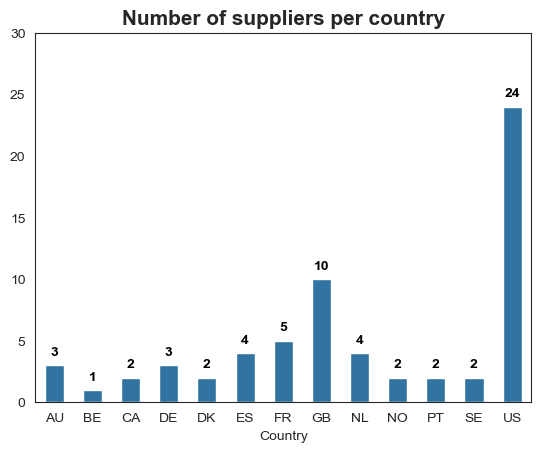

In [45]:
# Number of suppliers per country
unique_supplier=df.drop_duplicates(subset=['supplier_country', 'supplier_name'], keep='first')
supplier_count=unique_supplier.groupby('supplier_country').agg({'supplier_name':'count'}).\
                                                                rename(columns={'supplier_name':'supplier_count'}).\
                                                                reset_index()

ax=sns.barplot(data=supplier_count, x='supplier_country', y='supplier_count', width=0.5)
for i in ax.containers:
    ax.bar_label(i, padding=5, color='black', 
             fontsize=10, label_type='edge',
            fontweight='bold', 
            fmt='%d')
plt.xlabel('Country')
plt.ylabel(None)
plt.yticks(np.arange(0,31,5))
plt.title('Number of suppliers per country', fontsize=15, fontweight='bold')
;

**Insight**

There are quite a few suppliers from many countries, which shows that the company is trying to diversify its supply sources, avoiding the influence of a certain country. However, the number of orders from suppliers in the US is still overwhelming, leading to the fact that suppliers from other countries are quite difficult to cooperate with the company in the long term.

## End of analysis!